In [1]:
import pandas as pd
import numpy as np

ablation_depth_csv_path = "ablation_depth.csv"
df = pd.read_csv(ablation_depth_csv_path)

df_to_modify = df[df['method'] == 2].copy()
df_to_modify['depth'] = df_to_modify['depth'] / df_to_modify['num_params']
df_to_modify['method'] = 3
df = pd.concat([df, df_to_modify], ignore_index=True)
df = df[df['depth'] >= 20]
df = df[(df['num_params'] >= 1)]

grouped_df = df.groupby(['pkid', 'method'], as_index=False).agg({
    "depth": ["mean", "std"],
    "num_params": ["mean", "std"],
})

values = ["depth", 'num_params']

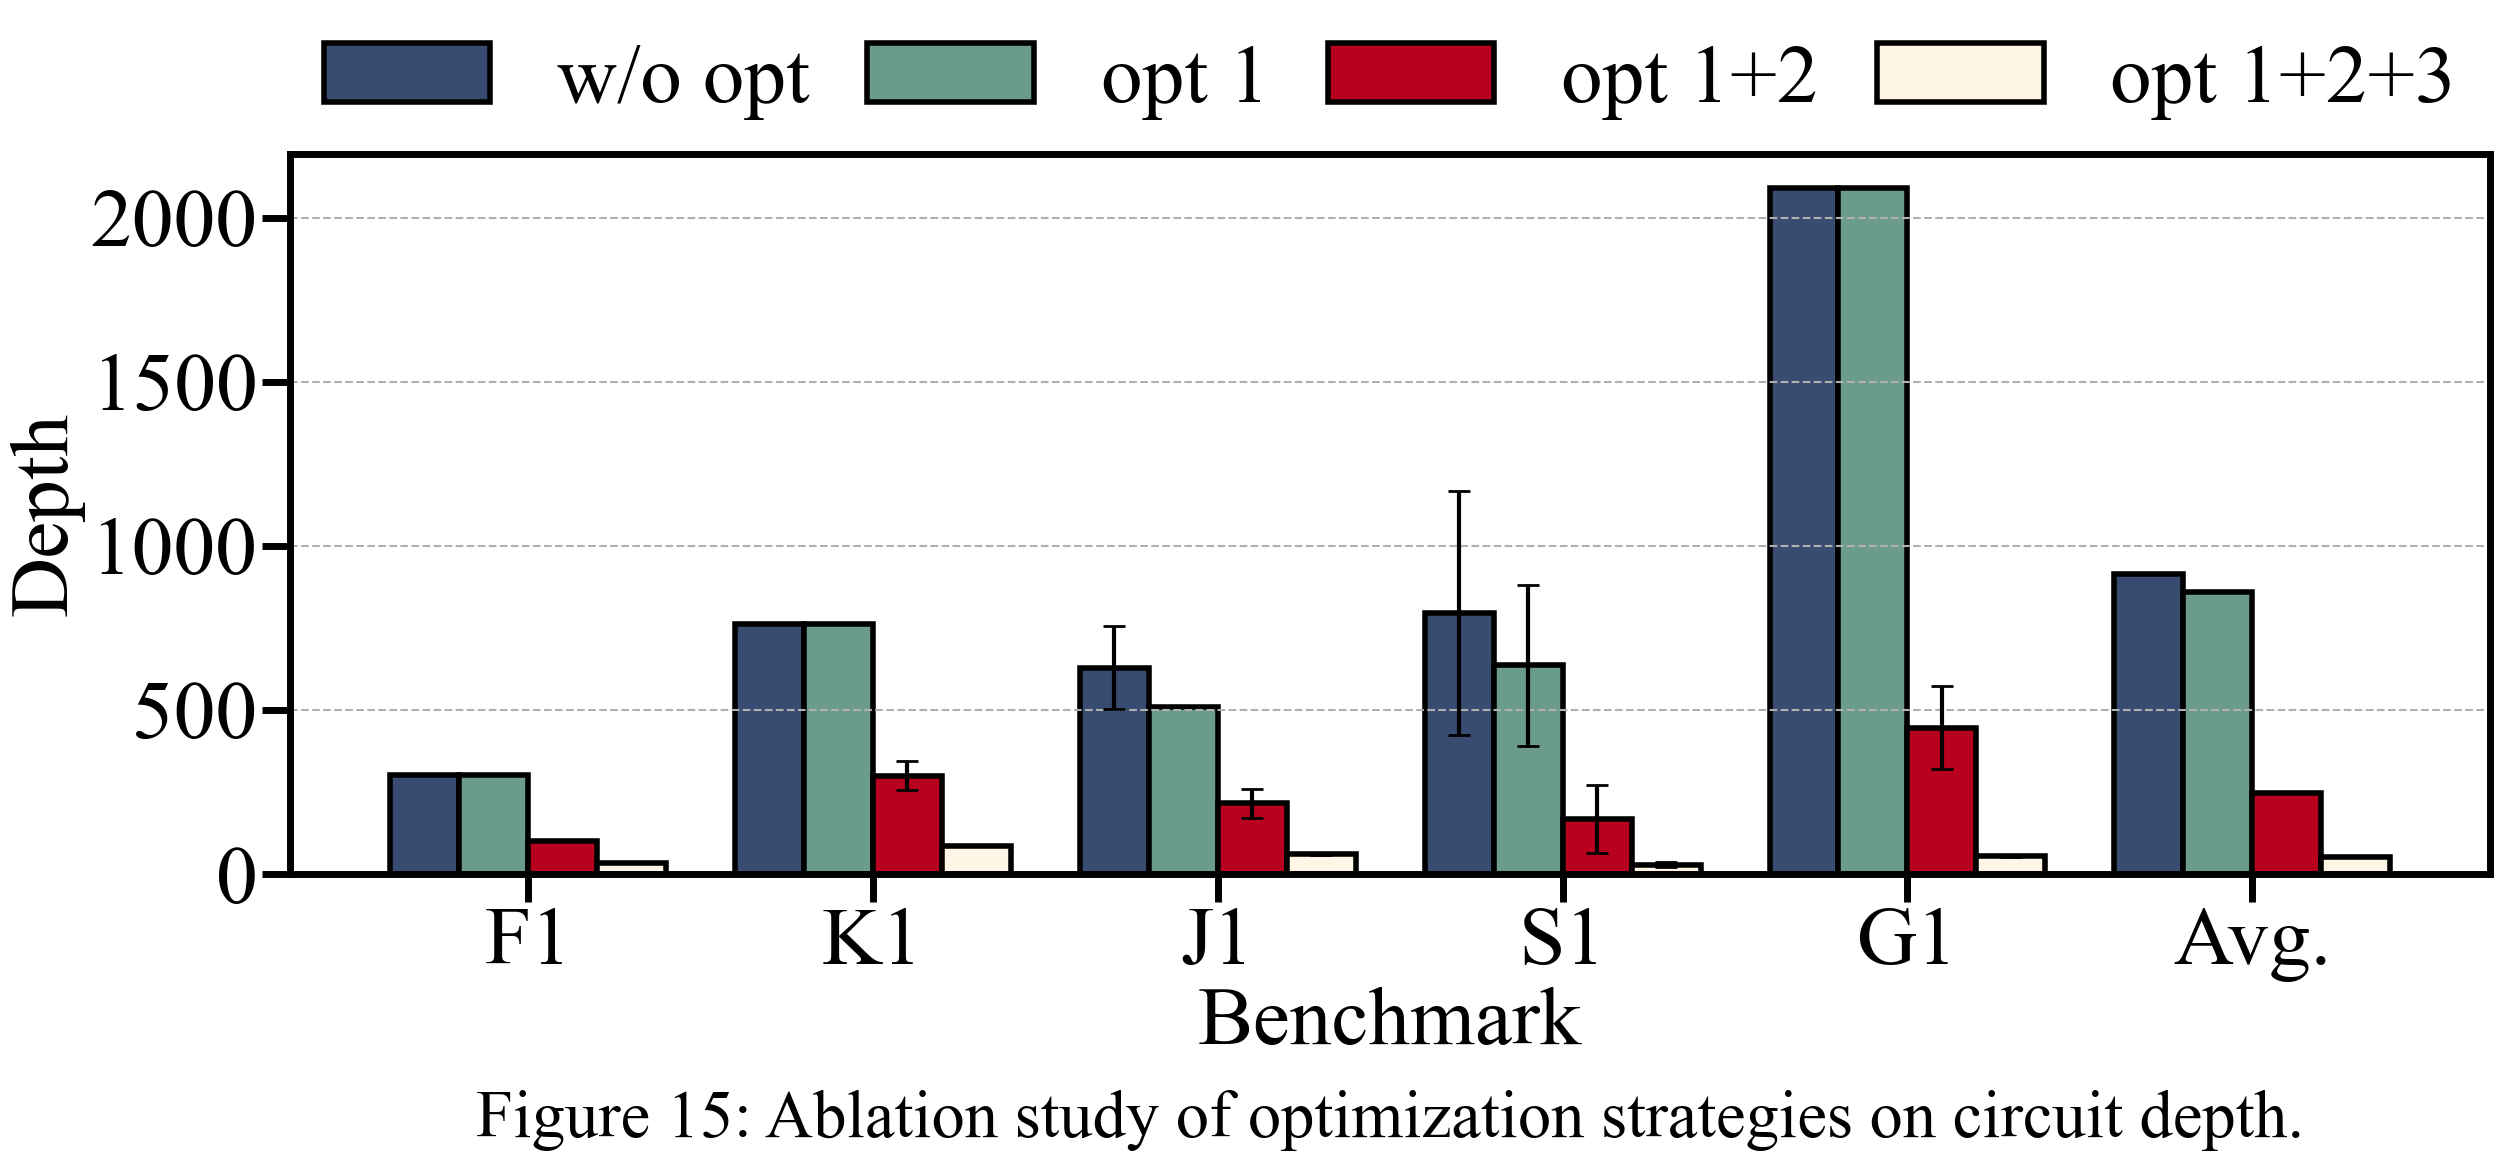

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'Times New Roman',
    'font.size': 60,
    'axes.unicode_minus': False,
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic',
    'mathtext.bf': 'Times New Roman:bold',
    'axes.linewidth': 5,
    'xtick.major.size': 20,
    'xtick.major.width': 5,
    'xtick.minor.size': 10,
    'xtick.minor.width': 3,
    'ytick.major.size': 20,
    'ytick.major.width': 5,
    'ytick.minor.size': 10,
    'ytick.minor.width': 3,
    'lines.markersize': 35,
    'lines.markeredgewidth': 4,
    'markers.fillstyle': 'full',
    'lines.markerfacecolor': '#f8d941',
    'lines.markeredgecolor': 'black',
})

scale = 1
fig = plt.figure(figsize=(22 * scale, 12 * scale))
ax = plt.axes((0, 0, 1, 0.6))

bar_width = 0.2
colors = ['#384B70', '#6A9C89', '#B8001F', '#FFF5E4']
labels = ['w/o opt', 'opt 1', 'opt 1+2', 'opt 1+2+3']
error_params = dict(elinewidth=3, ecolor='black', capsize=8, capthick=2)

for idx in range(4):
    data = grouped_df[grouped_df.method == idx]
    x = np.arange(len(data.pkid) + 1)
    y = data['depth']['mean'].to_list()
    y.append(np.mean(y))
    err = data['depth']['std'].to_list()
    err.append(0)

    ax.bar(
        x + idx * bar_width - bar_width,
        y,
        bar_width,
        color=colors[idx],
        yerr=err,
        error_kw=error_params,
        edgecolor="black",
        label=labels[idx],
        linewidth=4,
    )

ax.grid(True, linestyle='--', linewidth=1.5, axis='y')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(['F1', 'K1', 'J1', 'S1', 'G1', 'Avg.'])
ax.set_xlabel('Benchmark')
ax.set_ylabel('Depth')
ax.set_yticks([0, 500, 1000, 1500, 2000])

ax.legend(
    loc='upper left',
    ncol=4,
    frameon=False,
    bbox_to_anchor=(0, 1.0, 1, 0.2),
    mode="expand",
    borderaxespad=0,
)

title = "Figure 15: Ablation study of optimization strategies on circuit depth"
plt.suptitle(title, y=-0.18, fontsize=48)
plt.savefig(f'{title}.svg', bbox_inches='tight')
plt.show()